In [1]:
import numpy as np
import scipy.fftpack as spfft
from sklearn.linear_model import Lasso
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

import scipy

In [2]:
map_size = 50

In [3]:
map_bmp = np.array(Image.open(f'{map_size}x{map_size}_maze.bmp'))

In [4]:
map_bmp.shape

(50, 50)

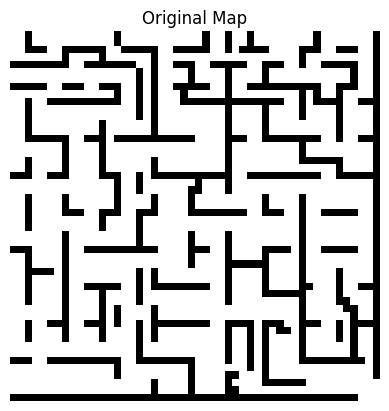

In [12]:
plt.figure()
img = plt.imshow(map_bmp)
img.set_cmap('gray')
plt.axis('off')
plt.title(f'Original Map')
plt.show()

In [5]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [6]:
dct_map = dct2(map_bmp)

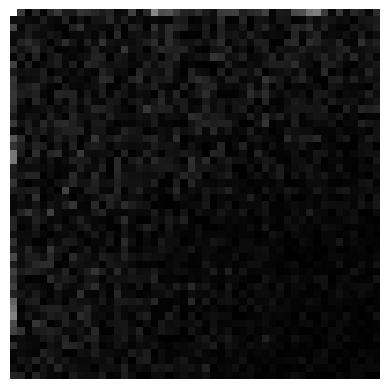

In [7]:
F = np.log(np.abs(dct_map)+1) # Put FFT on log scale
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

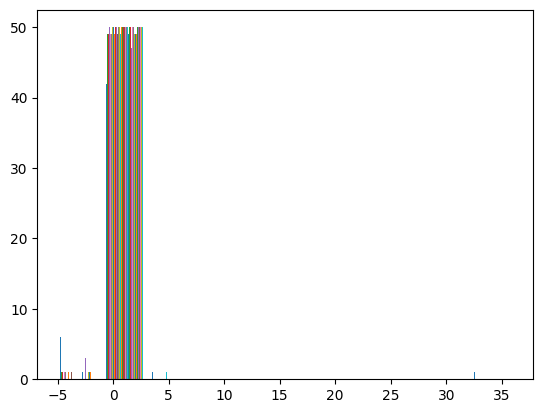

In [8]:
plt.hist(dct_map);

In [9]:
np.min(dct_map), np.max(dct_map)

(-5.202885981990549, 36.22000000000001)

In [10]:
# compress q-table (for given compression factor)
def compress_dct(Abw, keep):
    ## Compute FFT of image using fft2
    At = dct2(Abw)
    
    ## Zero out all small coefficients and inverse transform
    Bt = np.sort(np.abs(np.reshape(At,-1)))
    thresh = Bt[int(np.floor((1-keep)*len(Bt)))]
    ind = np.abs(At) > thresh
    Atlow = At * ind

    ## Inverse FFT
    Alow = idct2(Atlow)

    return Alow

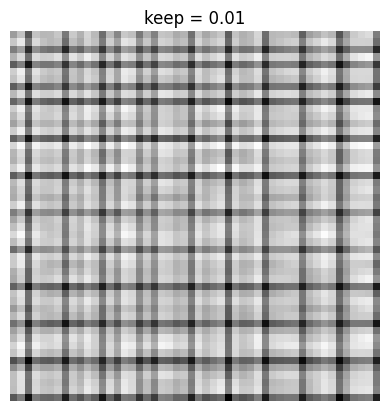

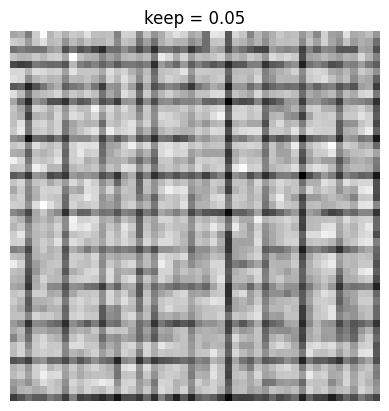

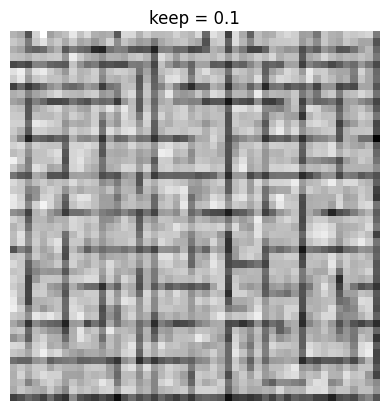

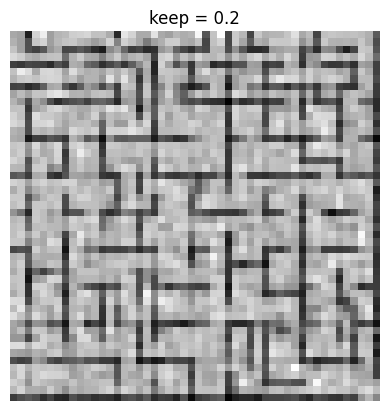

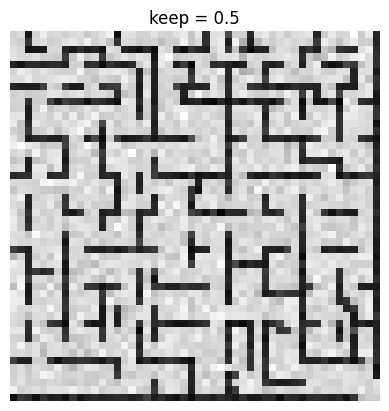

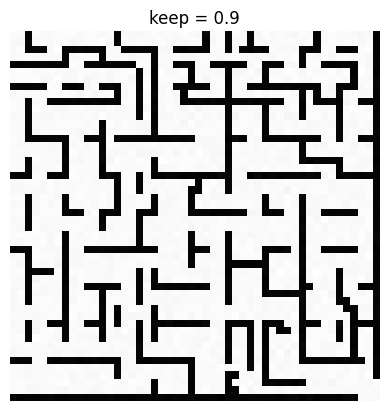

In [11]:
for i,keep in enumerate([0.01, 0.05, 0.1, 0.2, 0.5, 0.9]):
    compressed_map = compress_dct(map_bmp, keep)
    plt.figure(i+1)
    img = plt.imshow(compressed_map)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title(f'keep = {keep}')
    plt.show()
# viz_qtable(compressed_qtable, f"Keep = {keep}")